In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [4]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
#Taking Zeroes images as the only training dataset
only_zeros=X_train[Y_train==0]

In [6]:
only_zeros.shape

(5923, 28, 28)

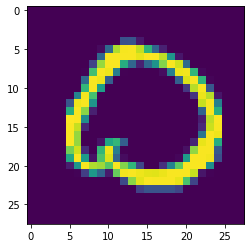

In [7]:
plt.imshow(only_zeros[100])

In [8]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Flatten,Dense,Reshape
import tensorflow as tf

In [15]:
#Discriminator Model
discrimnator=Sequential()
discrimnator.add(Flatten(input_shape=[28,28]))
discrimnator.add(Dense(150, activation='relu'))
discrimnator.add(Dense(100,activation='relu'))

discrimnator.compile(loss='binary_crossentropy',
                    optimizer='adam')

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [ ]:
#Reducing dimension size or Bottle neck representation size
coding_shape=100
#Generator Model
generator=Sequential()
generator.add(Dense(120,activation='relu',input_shape=[coding_shape]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [10]:
#GAN model
GAN= Sequential([generator,discrimnator])


NameError: name 'generator' is not defined

In [11]:
discrimnator.trainable=False

In [12]:
GAN.compile(loss='binary_crossentropy',
           optimizer='adam')

NameError: name 'GAN' is not defined

In [13]:
batch_size=64
my_data=only_zeros

In [14]:
#Creating Dataset
dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

In [167]:
dataset=dataset.batch(batch_size,drop_remainder=True)


In [168]:
epochs=1
GAN.layers

In [169]:
#Description of the Generator Model 
GAN.layers[0].summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 120)               12120     
_________________________________________________________________
dense_33 (Dense)             (None, 150)               18150     
_________________________________________________________________
dense_34 (Dense)             (None, 784)               118384    
_________________________________________________________________
reshape_6 (Reshape)          (None, 28, 28)            0         
Total params: 148,654
Trainable params: 148,654
Non-trainable params: 0
_________________________________________________________________


In [170]:
#Description of the Discriminator Model
GAN.layers[1].summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_31 (Dense)             (None, 100)               15100     
Total params: 265,700
Trainable params: 132,850
Non-trainable params: 132,850
_________________________________________________________________


In [171]:
generator,discrimnator=GAN.layers

In [172]:
for epochs in range(epochs):
    print(f"Currently on epochs {epochs+1}")
     
    i=0
    
    for X_batch in dataset:
        
        i=i+1
        
        if i%10== 0:
            
            print(f"Currently on batch number {i} of {len(my_data)//batch_size}")
                  
        
        # Discriminator Training Phase
        
        noise=tf.random.normal(shape=[batch_size,coding_shape])
        gen_images=generator(noise)
         
        x_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
                  
        y1=tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
                  
        discrimnator.trainable=True
                  
        discrimnator.train_on_batch(x_fake_vs_real,y1)
        
        # Generator Training
                  
        noise=tf.random.normal(shape=[batch_size,coding_shape])
        y2=tf.constant([[1.0]]*batch_size)
        discrimnator.trainable=False
        GAN.train_on_batch(noise,y2)
            
        
                  
        

Currently on epochs 1
Currently on batch number 10 of 92
Currently on batch number 20 of 92
Currently on batch number 30 of 92
Currently on batch number 40 of 92
Currently on batch number 50 of 92
Currently on batch number 60 of 92
Currently on batch number 70 of 92
Currently on batch number 80 of 92
Currently on batch number 90 of 92


In [178]:
noise=tf.random.normal(shape=[20,coding_shape])

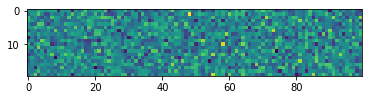

In [179]:
plt.imshow(noise)

In [180]:
images_generated=generator(noise)

In [181]:
images_generated.shape


TensorShape([20, 28, 28])

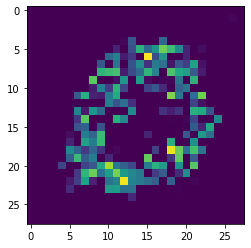

In [183]:
plt.imshow(images_generated[1])

In [ ]:
plt.imshow(images_generated[2])